# Time Series Forecasting

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Read our data
data = pd.read_excel("C:/Users/GetInnotized/Downloads/Dataset 1.xlsx", parse_dates=['original_sale_date'])

In [3]:
# Display first five rows
data.head()

,case_id,default_phone,SN,Product,original_sale_date,valid
0,Case 4783580343042048,2.547166e+11,310095430.0,B,2021-02-08,Invalid
1,Case 6087548486680576,2.547699e+11,NaN,NaN,2021-01-23,Invalid
2,Case 5087971198500864,2.541151e+11,309842945.0,B,2021-01-03,Invalid
3,Case 5898132420952064,2.547251e+11,NaN,NaN,2020-10-16,Invalid
4,Case 5662137616302080,2.547135e+11,306279485.0,B,2020-09-21,Invalid


In [4]:
# Get information on our columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80906 entries, 0 to 80905
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   case_id             80906 non-null  object        
 1   default_phone       65441 non-null  float64       
 2   SN                  74048 non-null  float64       
 3   Product             58538 non-null  object        
 4   original_sale_date  80906 non-null  datetime64[ns]
 5   valid               80906 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 3.7+ MB


In [5]:
# Check our data types
data.dtypes

case_id                       object
default_phone                float64
SN                           float64
Product                       object
original_sale_date    datetime64[ns]
valid                         object
dtype: object

In [6]:
# Count sales in each day
for i in data.original_sale_date:
    data["Count"] = 1   

In [7]:
# Check first five rows of the data
data.head()

,case_id,default_phone,SN,Product,original_sale_date,valid,Count
0,Case 4783580343042048,2.547166e+11,310095430.0,B,2021-02-08,Invalid,1
1,Case 6087548486680576,2.547699e+11,NaN,NaN,2021-01-23,Invalid,1
2,Case 5087971198500864,2.541151e+11,309842945.0,B,2021-01-03,Invalid,1
3,Case 5898132420952064,2.547251e+11,NaN,NaN,2020-10-16,Invalid,1
4,Case 5662137616302080,2.547135e+11,306279485.0,B,2020-09-21,Invalid,1


In [8]:
# Subset the data to two columns: original_sale_date & Count
data = data[["original_sale_date", "Count"]]

In [9]:
# Set date column as index
data.set_index("original_sale_date", inplace=True)

In [14]:
data.index

DatetimeIndex(['2021-02-08', '2021-01-23', '2021-01-03', '2020-10-16',
               '2020-09-21', '2020-09-07', '2020-08-11', '2020-05-09',
               '2021-01-23', '2020-10-01',
               ...
               '2020-02-21', '2020-11-02', '2020-08-01', '2020-09-07',
               '2020-08-25', '2020-08-25', '2020-07-09', '2020-05-25',
               '2020-05-25', '2020-05-25'],
              dtype='datetime64[ns]', name='original_sale_date', length=80906, freq=None)

In [33]:
New_data = pd.DataFrame(data.Count.resample('M').sum())
New_data

,Count
original_sale_date,
2019-11-30,1579
2019-12-31,3457
2020-01-31,2398
2020-02-29,2707
2020-03-31,3246
2020-04-30,3444
2020-05-31,6394
2020-06-30,6751
2020-07-31,6505


Text(0.5, 1.0, 'Number of Sales over time')

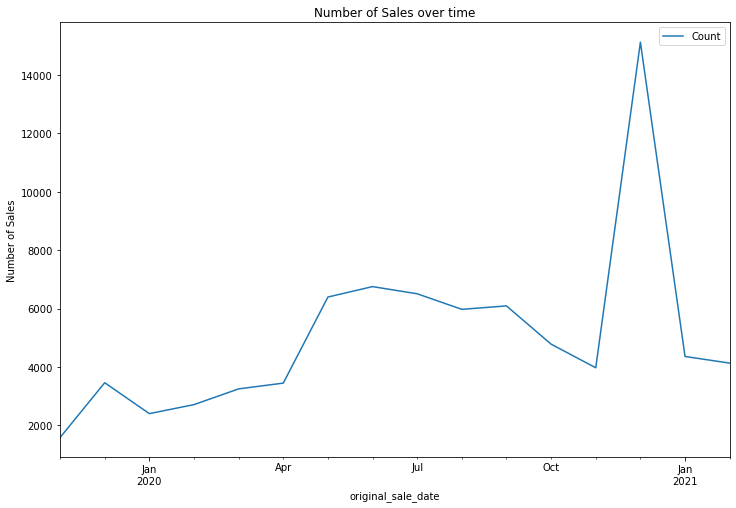

In [34]:
New_data.plot()
plt.rcParams["figure.figsize"] = (12,8)
plt.ylabel('Number of Sales')
plt.title("Number of Sales over time")

In [40]:
# Create time series features based on time series index

def get_features(New_data):
    New_data = New_data.copy()
    New_data["year"] = New_data.index.year
    New_data["month"] = New_data.index.month
    New_data["dayofyear"] = New_data.index.dayofyear
    return New_data

In [41]:
# Apply function on the data
New_data = get_features(New_data)

In [42]:
New_data

,Count,year,month,dayofyear
original_sale_date,,,,
2019-11-30,1579,2019,11,334
2019-12-31,3457,2019,12,365
2020-01-31,2398,2020,1,31
2020-02-29,2707,2020,2,60
2020-03-31,3246,2020,3,91
2020-04-30,3444,2020,4,121
2020-05-31,6394,2020,5,152
2020-06-30,6751,2020,6,182
2020-07-31,6505,2020,7,213


In [47]:
FEATURES = New_data[["year", "month", "dayofyear"]]
TARGET = New_data["Count"]

X_train = FEATURES
y_train = TARGET

# Create the Model

In [48]:
# import training and evaluation metrics
import xgboost as xgb
from sklearn.metrics import mean_absolute_error as mae

In [49]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [56]:
# Feature Importance
feat_imp = pd.DataFrame(data = reg.feature_importances_, 
                        index = reg.get_booster().get_score(importance_type="gain"), 
                        columns=["importance"])

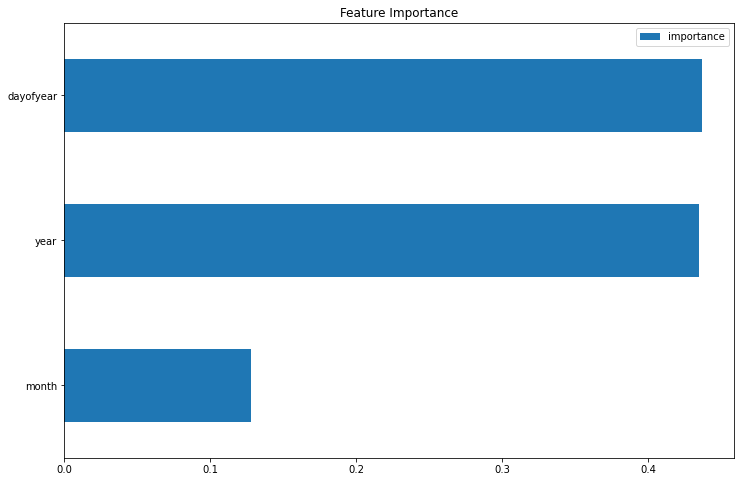

In [63]:
feat_imp.sort_values("importance").plot(kind = "barh", title = "Feature Importance")
plt.show()

In [51]:
print(f'MAE: {mae(y_train, reg.predict(X_train))}')

MAE: 0.001373291015625
